# Question 4 - Supplementary notebook

### This is a supplementary notebook for Question 4. 
### It is your responsibility to check the correctness of the inputs of the model, i.e. you must perform basic verifications.

----

***Double click on this cell to ensure that you can edit it.***
 
# Name and Surname: XXXX INSERT NAME AND SURNAMEXXX

# Student number: XXX INSERT STUDENT NUMBER XXX


In [1]:
try: 
    import engmod.structfem as sfem
except:
    print("*"*100)
    print("You must ensure that the engmod folder is the same directory as the jupyter notebook file")
    print("*"*100)    
    raise ValueError("You have to fix this")

import numpy as np
import scipy.optimize as sciopt
import scipy.linalg as slin
import matplotlib.pyplot as plt 

print("Successfully imported all modules")

Successfully imported all modules


In [2]:

#x_coor = 4
node_coordinates  = np.array([[0,0], # Node 0
                              [2,0], # Node 1
                              [0,1], # Node 2
                              [2,1], # Node 3
                              ]) 

elem_connectivity  = np.array([[0,1], 
                               [0,2], 
                               [0,3],
                               [1,2],
                               [1,3],
                               [2,3],
                                    ])

prescribed_displacement  = np.array([
                                     [0,0,0], # 
                                     [0,1,0], # 
                                     [1,0,0], # 
                                     [1,1,0], #                           
                                            ])

prescribed_force = np.array([[2,1,-20000*9.8/2],
                            [3,1,-20000*9.8/2],
                            ])

E   = 200E9 # Pa
A   = 0.2   # m^2
rho = 7800  # kg/m^3

elem_E = np.array([E,E,E,E,E,E])           # Young's modulus of Element 0, Element 1
elem_A = np.array([A,A,A,A,A,A])           # Area of Element 0, Element 1

elemprop = {"A": elem_A,
            "E": elem_E,
            "density": rho * np.ones(len(elem_A))}

tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements


tmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.02836654e-07, -2.29858167e-06,  3.02836654e-07, -2.29858167e-06]),
 'loads': array([ 12113.4661795,  98000.       , -12113.4661795,  98000.       ,
             0.       , -98000.       ,      0.       , -98000.       ])}

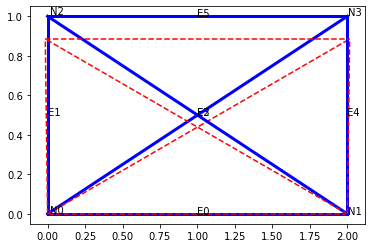

In [3]:
tmn.plot_system(show_element_numbers=True,
                show_node_numbers=True,
                show_displacement=True,
                magnification=50000)

In [4]:
tmn.get_mass()

16336.532089799344

In [5]:
a = tmn.solution_dict["displacements"]
print(a)
print(max(abs(a)))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.02836654e-07 -2.29858167e-06  3.02836654e-07 -2.29858167e-06]
2.298581672756276e-06


In [6]:
maxSigama = tmn.post_stress_strain()["stress"]
print(maxSigama)
print(max(abs(maxSigama)))

[      0.         -459716.33455126  -67716.33455126  -67716.33455126
 -459716.33455126   60567.33089749]
459716.33455125516


In [7]:
def Weight(unknowns):
    elem_A = np.array([unknowns[0],unknowns[1],unknowns[2],unknowns[3],unknowns[4],unknowns[5]])
    #print(elem_A)
    elemprop = {"A": elem_A,"E": elem_E,"density": rho * np.ones(6)}
    tmn = sfem.FEM_Truss_2D(node_coordinates,elem_connectivity, prescribed_displacement,prescribed_force,elemprop)
    tmn.solve()
    a = tmn.get_mass()
    #print(a)
    return a
    
def maxDisplacementDelta(unknowns):
    elem_A = np.array([unknowns[0],unknowns[1],unknowns[2],unknowns[3],unknowns[4],unknowns[5]])
    #print(elem_A)
    elemprop = {"A": elem_A,"E": elem_E,"density": rho * np.ones(6)}
    tmn = sfem.FEM_Truss_2D(node_coordinates,elem_connectivity, prescribed_displacement,prescribed_force,elemprop)
    tmn.solve()
    a = tmn.solution_dict["displacements"]
    #print(a)
    return (1)-(max(abs(a))*1000)

def maxStressDelta(unknowns):
    elem_A = np.array([unknowns[0],unknowns[1],unknowns[2],unknowns[3],unknowns[4],unknowns[5]])
    #print(elem_A)
    elemprop = {"A": elem_A,"E": elem_E,"density": rho * np.ones(6)}
    tmn = sfem.FEM_Truss_2D(node_coordinates,elem_connectivity, prescribed_displacement,prescribed_force,elemprop)
    tmn.solve()
    a = tmn.post_stress_strain()["stress"]
    return (250)-(max(abs(a))/1000000)

In [8]:
con1 = {'type': 'eq', 'fun': maxDisplacementDelta}
con2 = {'type': 'ineq', 'fun': maxStressDelta}
constraints = [con1,con2]
bnd = [0.00001,0.2]
bounds=[bnd,bnd,bnd,bnd,bnd,bnd]

In [9]:
A   = 0.2   # m^2
SolutionInitCon = ([A,A,A,A,A,A])
print(Weight(SolutionInitCon))
print(maxDisplacementDelta(SolutionInitCon))
print(maxStressDelta(SolutionInitCon))


16336.532089799344
0.9977014183272437
249.54028366544875


In [10]:
myoptions={'disp':True,'maxiter': 100}#, 'ftol':0.1}
solution = sciopt.minimize(Weight ,SolutionInitCon ,bounds=bounds, method='SLSQP',options = myoptions ,constraints=constraints )

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Iteration limit reached    (Exit mode 9)
            Current function value: 225.09043588820097
            Iterations: 100
            Function evaluations: 1645
            Gradient evaluations: 99


In [11]:
elem_A = np.array(solution.x)           # Area of Element 0, Element 1

elemprop = {"A": elem_A,"E": elem_E,"density": rho * np.ones(6)}
tmn = sfem.FEM_Truss_2D(node_coordinates,elem_connectivity, prescribed_displacement,prescribed_force,elemprop)
tmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.29950236e-07, -2.04200562e-04,  8.27666958e-05, -3.70996342e-04]),
 'loads': array([ 23362.07213824,  98000.        , -23362.07213824,  98000.        ,
             0.        , -98000.        ,      0.        , -98000.        ])}

In [12]:
tmn.get_mass()

225.09043588820097

In [13]:
print(solution.x)

[0.00283955 0.00211358 0.00317814 0.00317818 0.00116334 0.00284429]
